#  Matplotlib Tutorial
======================

## Background

1. Matlab-like plotting package for python.

*   List item
*   List item


2. A hierarchical strcture packages. 
3. “state-machine environment” is the top layer which is provided by _matplotlib.pyplot_.

<h1><center> An example of matplotlib figure</center></h1>
![good](./Figures/anatomy.png "Title")

1. The second layer is an object-oriented interface.
2. pyplot allow users to create multiple axis objects.


In [0]:
!pip install --user --upgrade numpy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

## figures can be shown in the Jupyter notebook.
%matplotlib inline 
np.random.seed(19680801)


Requirement already up-to-date: numpy in /root/.local/lib/python3.6/site-packages (1.15.4)


In [0]:
np.random.randint(0, 100, 10)

array([20, 84, 60,  6, 34, 34, 23, 67, 49, 36])

In [0]:
np.random.randint(0, 100, 10)

array([18, 75, 72, 37, 11, 67, 69, 48, 59, 73])

In [0]:
print(np.version.version)
X = np.linspace(0.5, 3.5, 100)  # Create a vector with 100 samples from 0.5 to 3.5 with the same interval.
with np.printoptions(formatter={'float': '{:1.3f}'.format}):  # Set the print environment for python. 
    print("X =", end=' ')
    print(X)


1.15.4
X = [0.500 0.530 0.561 0.591 0.621 0.652 0.682 0.712 0.742 0.773 0.803 0.833
 0.864 0.894 0.924 0.955 0.985 1.015 1.045 1.076 1.106 1.136 1.167 1.197
 1.227 1.258 1.288 1.318 1.348 1.379 1.409 1.439 1.470 1.500 1.530 1.561
 1.591 1.621 1.652 1.682 1.712 1.742 1.773 1.803 1.833 1.864 1.894 1.924
 1.955 1.985 2.015 2.045 2.076 2.106 2.136 2.167 2.197 2.227 2.258 2.288
 2.318 2.348 2.379 2.409 2.439 2.470 2.500 2.530 2.561 2.591 2.621 2.652
 2.682 2.712 2.742 2.773 2.803 2.833 2.864 2.894 2.924 2.955 2.985 3.015
 3.045 3.076 3.106 3.136 3.167 3.197 3.227 3.258 3.288 3.318 3.348 3.379
 3.409 3.439 3.470 3.500]


In [0]:
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(X+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))  # Draw 100 samples from a uniform distribution from Y1[i] to Y2[i] 

In [0]:
mu = abs(np.mean(Y2 - Y1))
sigma = 0.1
Y4 = np.random.normal(mu, sigma, 100)
sigma = 0.1 * np.abs(Y2-Y1)
sigma

array([0.26809732, 0.26990143, 0.27170811, 0.27350191, 0.27526715,
       0.27698796, 0.27864839, 0.2802325 , 0.28172445, 0.28310855,
       0.2843694 , 0.28549194, 0.28646153, 0.28726405, 0.28788597,
       0.28831445, 0.28853735, 0.28854336, 0.28832207, 0.28786397,
       0.28716056, 0.2862044 , 0.28498914, 0.28350955, 0.2817616 ,
       0.27974244, 0.27745047, 0.27488532, 0.27204789, 0.26894034,
       0.26556612, 0.26192992, 0.25803767, 0.25389655, 0.24951495,
       0.24490242, 0.24006964, 0.23502842, 0.22979159, 0.22437298,
       0.21878738, 0.21305044, 0.20717861, 0.20118909, 0.19509974,
       0.18892902, 0.18269586, 0.17641965, 0.17012009, 0.16381712,
       0.15753085, 0.15128147, 0.14508912, 0.13897384, 0.13295546,
       0.12705353, 0.12128721, 0.11567519, 0.1102356 , 0.10498597,
       0.09994307, 0.09512293, 0.09054069, 0.08621058, 0.08214583,
       0.07835863, 0.07486006, 0.07166007, 0.0687674 , 0.06618955,
       0.0639328 , 0.0620021 , 0.06040114, 0.05913224, 0.05819

In [0]:
len(X)

100

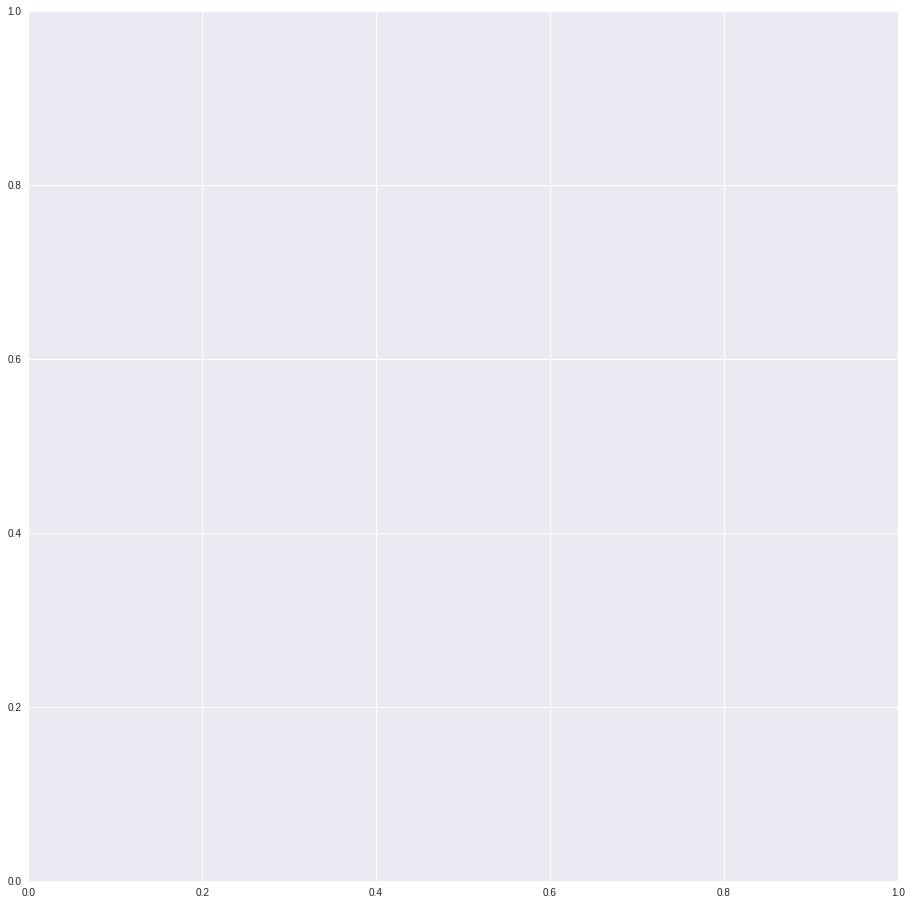

In [0]:
fig = plt.figure(figsize=(16, 16))

#  Add an Axes to figure as part of subplot arrangement.
#  first digit is the number of rows, the second the number of columns, and the third the index of the subplot
ax = fig.add_subplot(1, 1, 1, aspect=1) 

In [0]:
def minor_tick(x, pos):
    """Define a minor tick
    If the value of axis label can be divided by 1.0, it will not be shown in the figure.
    otherwise minor ticks will be shown.
    Args: 
        x: the axis value.
        pos: the position of the value.
    Returns:
        A float value of minor axis text
    """
    if not x % 1.0:
        return ""
    return "%.1f" % x

In [0]:
#  set_major_locator(): Set the locator of the major ticker. 
#  MultipleLocator(base): Set a tick on each integer multiple of a base within the view interval
#  AutoMinorLocator(base): Dynamically find minor tick positions based on the positions of major ticks.
#  The scale must be linear with major ticks evenly spaced.
#  n is the number of subdivisions of the interval between major ticks; 
ax.xaxis.set_major_locator(MultipleLocator(1.000))  
ax.xaxis.set_minor_locator(AutoMinorLocator(10))  
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

#  Use a user-defined function for formatting.
#  The function should take in two inputs (a tick value x and a position pos), 
#  and return a string containing the corresponding tick label.
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))


#  Set the data limits for the x-axis and y-axis
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)


#  Set the parameters of ticks
ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

#  Set the grid
ax.grid(linestyle='--', linewidth=0.5, color='0.25')


In [0]:
# draw
ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signals")
ax.plot(X, Y3, linewidth=0, marker='o', markerfacecolor='r', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")
ax.legend()

In [0]:
def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x,y), radius, clip_on=False, zorder=10, linewidth=1,
                   edgecolor='black', facecolor=(0,0,0,0.0125),
                   path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)

In [0]:
def text(x, y, text):
    ax.text(x, y, text, backgroundcolor='white',
           ha='center', va='top', weight='bold', color='blue')

In [1]:
#  Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor  tick label")

#  Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

NameError: ignored

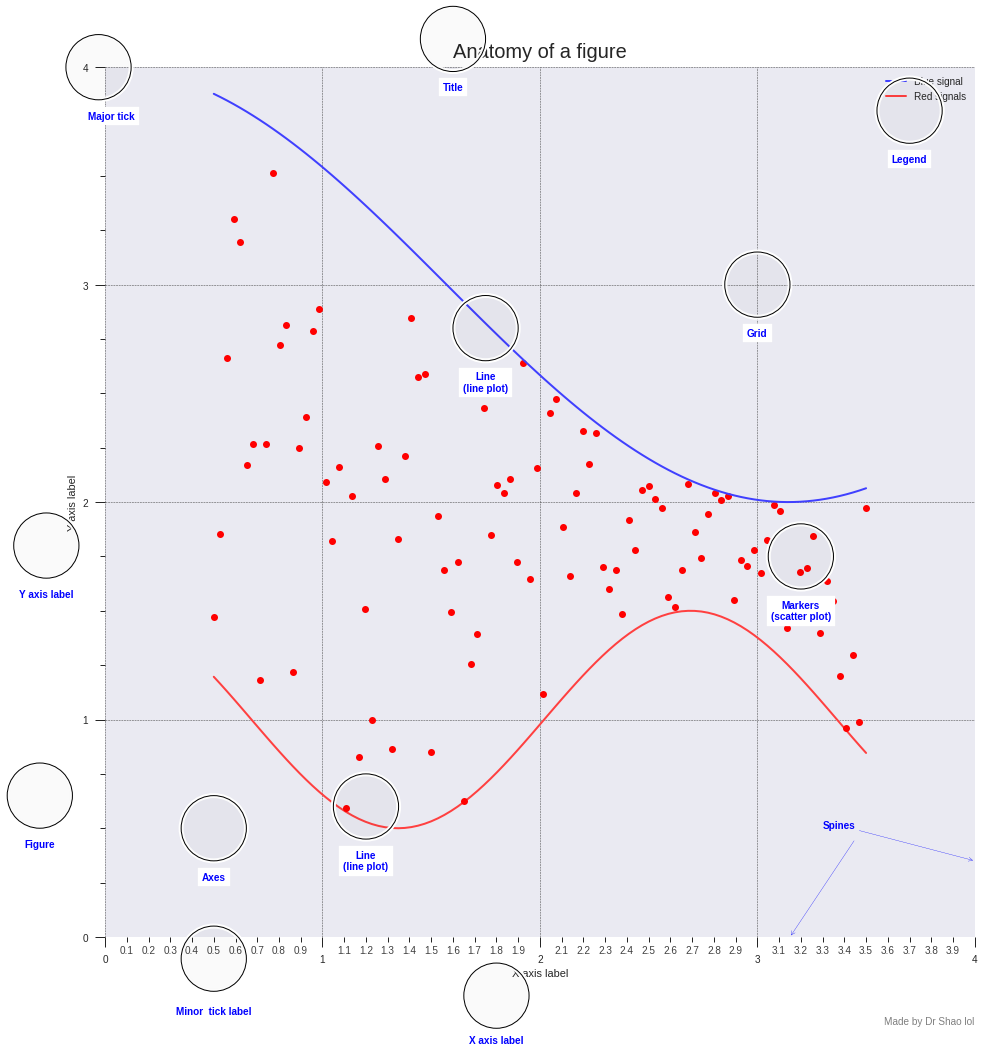

In [0]:
color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made by Dr Shao lol", fontsize=10, ha="right", color='.5')

fig

Figure
* A figure can contains one or multiple axes.
* A figure usuually contains title, legends, etc. 

In [1]:
fig = plt.figure()
fig, ax_lst = plt.subplots(2, 2)

NameError: ignored

###  Axes
* One axes consists of two axis objects.
* Title, data limits and lables.
* One axes belongs to one figure.


### Artist
* Include every object in the figure
* Most artist are tied to an axes.

## Types of inputs to plotting functions
* Only accept np.array and np.ma.masked_array


In [2]:
matplotlib_fig_input_numpy_array = np.array([[1, 2, 3], [4, 5, 6]])
print(matplotlib_fig_input_numpy_array)

matplotlib_fig_input_masked_array = \
    np.ma.masked_array([[1, 2, 3], [4, 5, 6]])
matplotlib_fig_input_masked_array

NameError: ignored

## Pyplot example

In [0]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


x = np.linspace(0, 2, 100) ## create a list of 100 samples by step=2

## The first call to plt.plot will automatically create the necessary figure and axes to achieve the desired plot.
## Subsequent calls to plt.plot re-use the current axes and each add another line. 
## Setting the title, legend, and axis labels also automatically use the current axes and set the title, create the legend, and label the axis respectively.
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**7 + x**5 -  5*x**3 - x**2 - x, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple plot")

plt.legend()



### Backends

*  Differenrt Backends targers to differet output (script, jupyter notebook and interactive interface)
*  Frontend is the user facing code
*  User interface backends (Qt4, pygtk) and hardcopy backends (PNG, PDF)





#### Interactive Mode 

*   Plotting on the screen
*   It can be turned on or off



In [0]:
import matplotlib
matplotlib.is_interactive()

In [0]:
import matplotlib.pyplot as plt
plt.ion() ## Turn on the interactive mode
plt.plot([1.2, 2.7])
plt.title("interactive test")
plt.xlabel("index")

In [0]:
ax = plt.gca() ## Get the current Axes instance on the current figure matching the given keyword args, or create one.
ax.plot([3.1, 2.2])

#### Non-interactive example

In [0]:
import matplotlib.pyplot as plt
plt.ioff() # turn off the interactive mode
plt.plot([1.6, 2.7])
plt.show()

# Pyplot 


### Introduction 



*  Pyplot is a collection of command style functons that make matplotlib work like MATLIB
*  Pyplot keeps track of things lie the current figure and plotting area
*  Pyplot plot functions are directed to the currernt axes


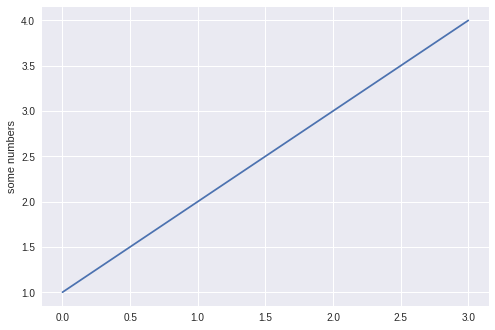

In [3]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4]) ## plot can generate x axis automatically
plt.ylabel('some numbers')
plt.show()

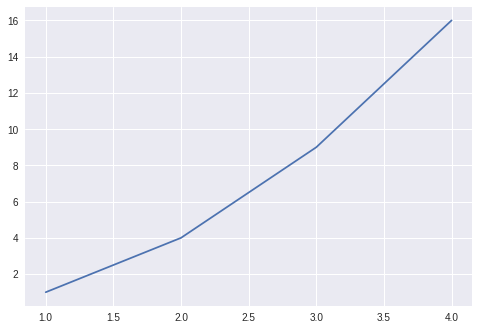

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16]) ## plot x vs y

#### Have a try on x^3

Doc [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)



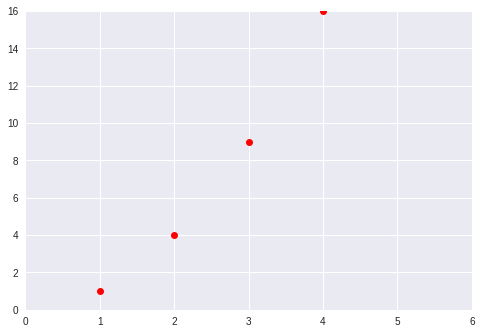

In [5]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 16]) # x_min, x_max, y_min, y_max
plt.show()

### Try some other color and shapes

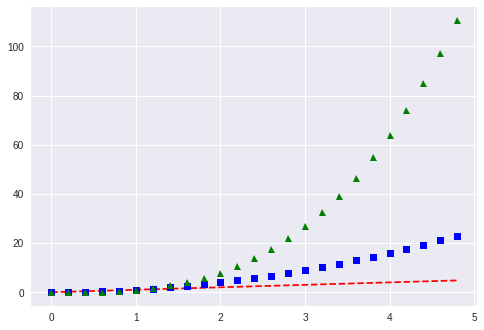

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)  ## numpy.arange([start, ]stop, [step, ]dtype=None)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

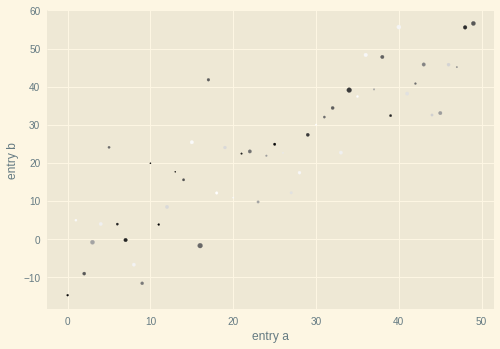

In [7]:
plt.style.use('Solarize_Light2')
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 10

plt.scatter('a', 'b', c='c', s='d', data=data)  ## x,y; c: color; s: scalar 
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

In [8]:
print(plt.style.available)

['seaborn-colorblind', 'seaborn-whitegrid', 'fast', 'seaborn-talk', 'classic', 'seaborn', '_classic_test', 'grayscale', 'seaborn-poster', 'seaborn-dark', 'seaborn-bright', 'seaborn-deep', 'ggplot', 'seaborn-ticks', 'bmh', 'seaborn-pastel', 'Solarize_Light2', 'seaborn-white', 'fivethirtyeight', 'seaborn-muted', 'seaborn-paper', 'dark_background', 'seaborn-dark-palette', 'seaborn-notebook', 'seaborn-darkgrid']


#### Please pick up different style and choose the best one

### Plotting with categorical variables

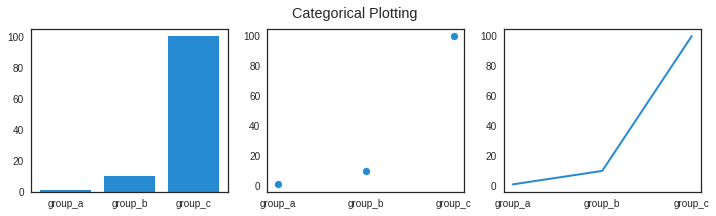

In [9]:
plt.style.use('seaborn-white')
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

## figure number, figure size = width, height in inches
plt.figure(1, figsize=(12, 3))

plt.subplot(131) # position of subfigure row, col and index
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

### Controlling line properties

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: bool 
  antialiased or aa: [True | False] 
  clip_box: a `~.Bbox` instance 
  clip_on: bool 
  clip_path: [(`~matplotlib.path.Path`, `~.Transform`) | `~.Patch` | None] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a `~.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: object 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash-seq) | ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` | ``' '`` | ``''``]
  linewidth or lw: float value in points 
  marker: 

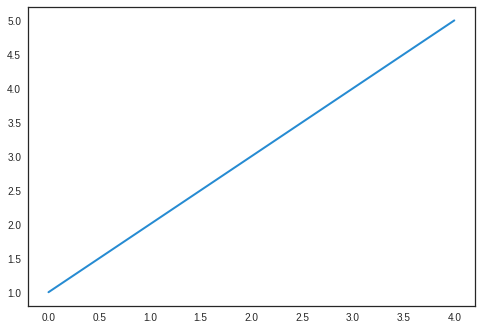

In [10]:
lines = plt.plot([1, 2, 3, 4, 5])
plt.setp(lines)

### Multiple figures and axes

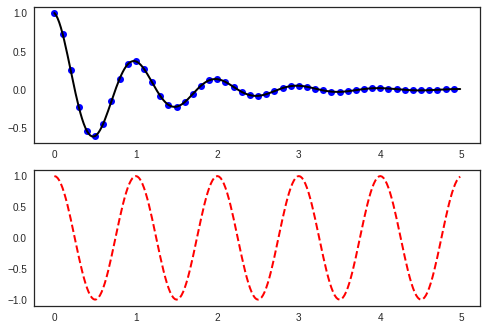

In [11]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Easy as 1, 2, 3')

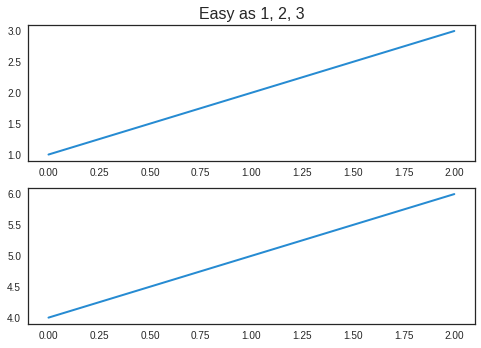

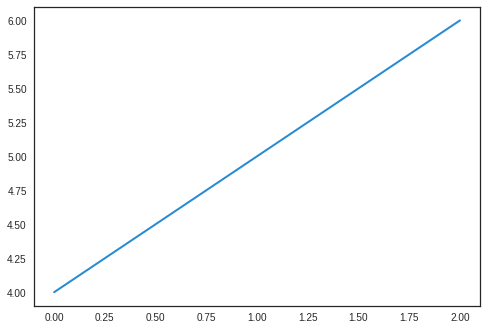

In [12]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

### Working with text

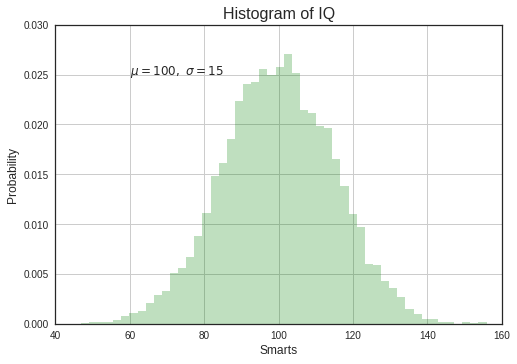

In [13]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.25)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

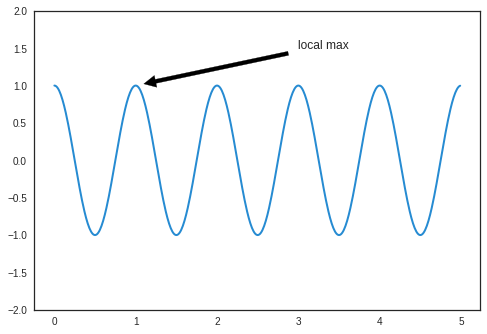

In [14]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(1, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
## xy is the location of the arrow. xytext is the location of the text
plt.ylim(-2, 2)
plt.show()

### Logarithmic and other nonlinear axes
* Why we use other nonlinear axes?


* When should we use other nonlinear axes?



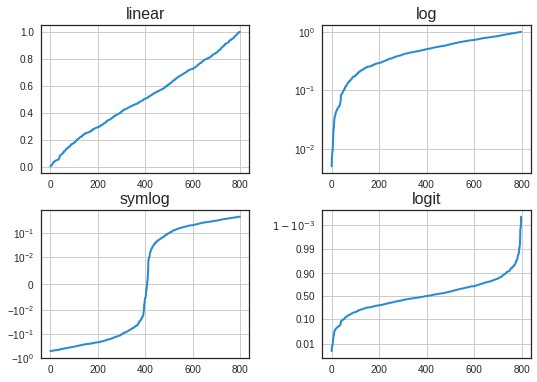

In [15]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

### Some Samples
#### line plot

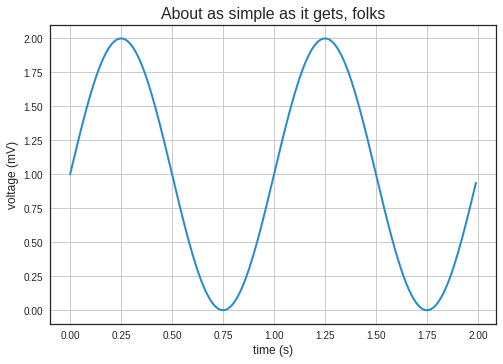

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t) # sin(2pi*t) + 1

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.pdf") ## try other formats
plt.show()

#### pcolormesh

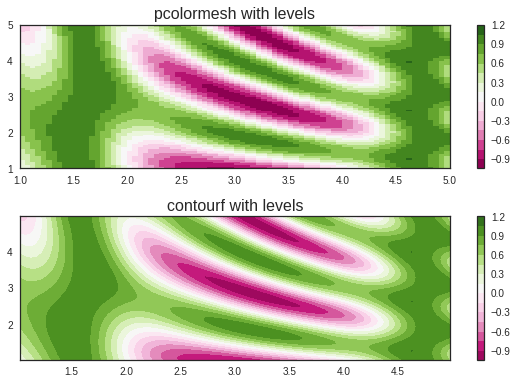

In [17]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
# The slice() constructor creates a slice object representing the set of indices specified by range(start, stop, step).
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]


z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

#### Histograms

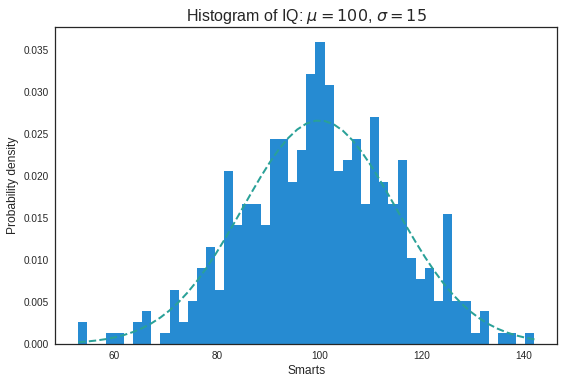

In [18]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437) # np.randon.randn Return a sample (or samples) from the “standard normal” distribution.

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
# patches: Silent list of individual patches used to create the histogram or list of such list if multiple input datasets.
n, bins, patches = ax.hist(x, num_bins, density=1) # density = true means PDF

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

#### Path

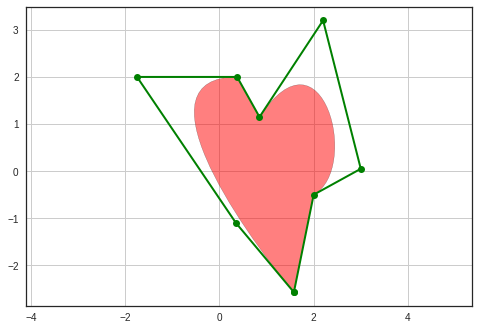

In [19]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

#### A stream plot, or streamline plot, is used to display 2D vector fields. This example shows a few features of the streamplot() function:

* Varying the color along a streamline.
* Varying the density of streamlines.
* Varying the line width along a streamline.
* Controlling the starting points of streamlines.
* Streamlines skipping masked regions and NaN values.

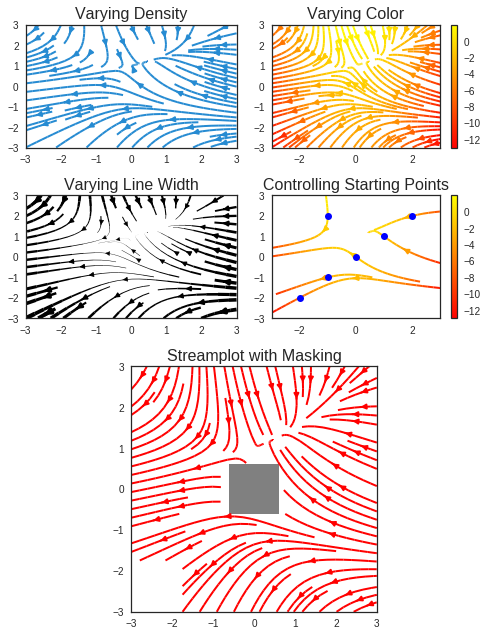

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
# if the step length is a complex number (e.g. 5j), 
# then the integer part of its magnitude is interpreted as specifying the number of points to create between the start and stop values, where the stop value is inclusive.
Y, X = np.mgrid[-w:w:100j, -w:w:100j] 
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                     cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.axis((-w, w, -w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5,
          interpolation='nearest', cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()

#### Bar charts

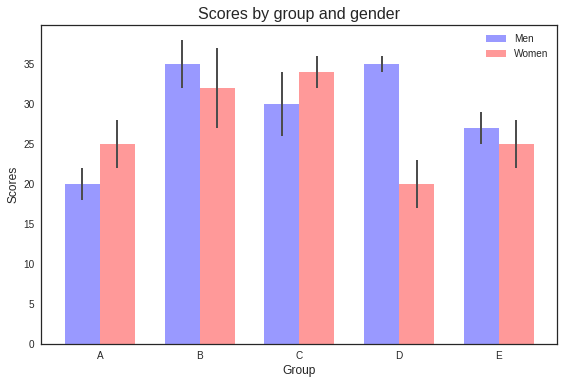

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                yerr=std_men, error_kw=error_config,
                label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r',
                yerr=std_women, error_kw=error_config,
                label='Women')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
ax.legend()

fig.tight_layout()
plt.show()

#### Pie chart

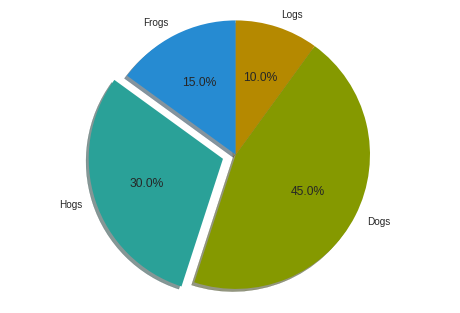

In [22]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Table

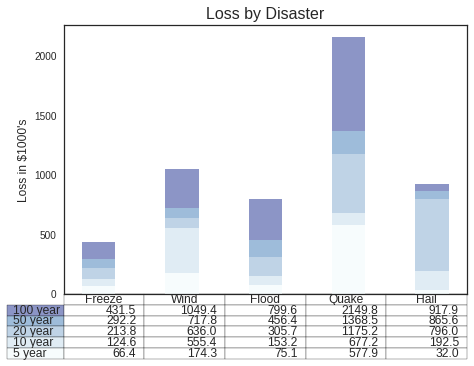

In [23]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

#### Scatter

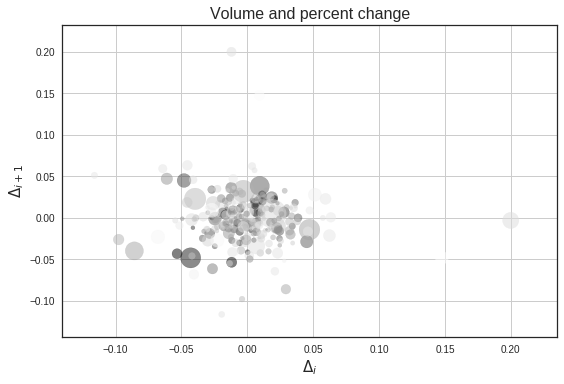

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook



# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

#### Time-series data Visualization

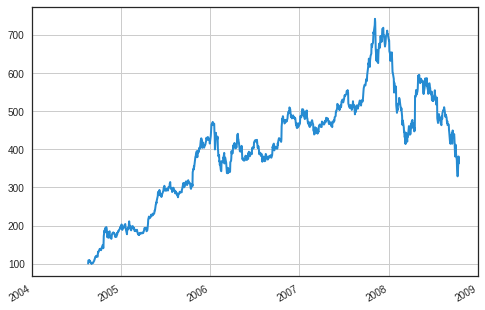

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)

fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years...
datemin = np.datetime64(r.date[0], 'Y')
datemax = np.datetime64(r.date[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()